___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

The domain you must have remembered it because you are worked on under project **"EDA for Car Price Prediction Model"**. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will use the data sets prepared for algorithms as a result of the EDA project.

So this study assumes that you are working on the EDA project and that you have sufficient domain knowledge.

Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this case, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression, Random Forest*** and ***XG Boost*** algorithms respectively. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_pickle("golden_data_dummy.pkl")

In [3]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,1422.0,66.0,16200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14990 entries, 0 to 15918
Columns: 136 entries, displacement to type_Used
dtypes: float64(86), int64(5), uint8(45)
memory usage: 11.2 MB


In [5]:
df.describe()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
count,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,...,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000
mean,1432.258843,88.231744,33894.105203,0.949767,0.080187,0.133422,0.126484,0.082188,0.859239,0.155704,...,0.030754,0.471781,0.000133,0.524149,0.003936,0.051634,0.067178,0.054236,0.090127,0.736825
std,271.764876,26.617304,37284.577857,0.218434,0.271591,0.340042,0.332405,0.274660,0.347786,0.362586,...,0.172656,0.499220,0.011550,0.499433,0.062616,0.221295,0.250339,0.226491,0.286373,0.440372
min,890.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1229.000000,66.000000,5000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1461.000000,85.000000,22487.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1598.000000,100.000000,49264.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2967.000000,294.000000,317000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

displacement                  0
hp                            0
km                            0
ss_abs                        0
ss_adaptive_cruise_control    0
                             ..
type_Demonstration            0
type_Employee's car           0
type_New                      0
type_Pre-registered           0
type_Used                     0
Length: 136, dtype: int64

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [7]:
X=df.drop("price",axis=1)
y=df.price

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [9]:
lm=LinearRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)

In [10]:
coefficients=lm.coef_


In [11]:
lm.intercept_

12877.546139252463

In [12]:
print("r2 score:",r2_score(y_test,y_pred))
print("MAE :",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("rmse:",np.sqrt(mean_squared_error(y_test,y_pred)))


r2 score: 0.8918333328983833
MAE : 1672.9305977880838
MSE: 5482500.359230762
rmse: 2341.47397150401


In [13]:
result={"y_pred":y_pred ,"y_test":y_test}
print(pd.DataFrame(result))

             y_pred  y_test
10749  16300.707541   11825
9506   11124.158552    9790
7962   18091.815539   16990
1709   16255.100216   16490
15907  42669.304279   39990
...             ...     ...
80     21716.287318   18850
4465   21275.580418   19900
14192   9531.576329    9800
11009  14444.401310   13500
4976   20684.398139   21750

[4497 rows x 2 columns]


In [14]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(lm,X_train,y_train)
cv_scores

array([0.88505619, 0.88684462, 0.88293418, 0.88412374, 0.89259498])

In [15]:
cv_scores.mean()

0.8863107422744021

<AxesSubplot:xlabel='price'>

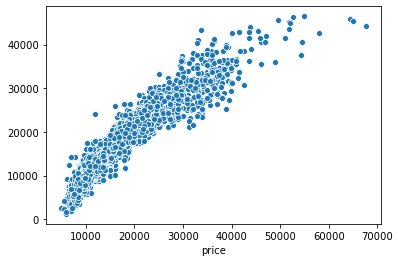

In [16]:
sns.scatterplot(x="y_test",y="y_pred",data=result)

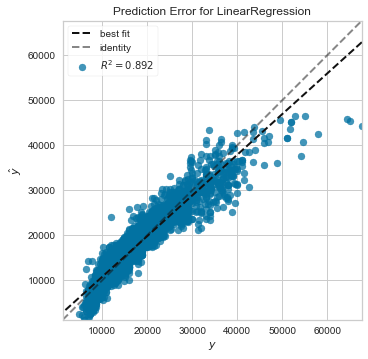

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [17]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

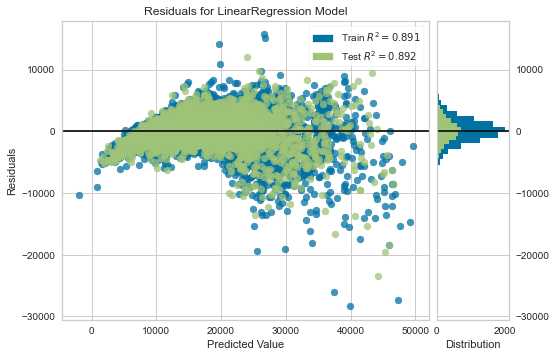

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [18]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [19]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [20]:
ridge=Ridge(normalize=True)
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)

In [21]:
print("r2 score:",r2_score(y_test,y_pred))
print("MAE :",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("rmse:",np.sqrt(mean_squared_error(y_test,y_pred)))


r2 score: 0.8351296199768288
MAE : 1962.1666036215033
MSE: 8356566.231761421
rmse: 2890.7726011849186


In [22]:
alpha_s=np.linspace(0.1,20,50)

In [23]:
ridgecv=RidgeCV(alphas=alpha_s,normalize=True,cv=5).fit(X_train,y_train)

In [24]:
ridgecv.alpha_

0.1

In [26]:
ridge=Ridge(alpha=0.1,normalize=True)
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)

In [27]:
print("r2 score:",r2_score(y_test,y_pred))
print("MAE :",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("rmse:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: 0.8893443001311121
MAE : 1668.837611257598
MSE: 5608658.661102832
rmse: 2368.260682674699


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [28]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [29]:
X=df.drop("price",axis=1)
y=df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
lasso_model=Lasso(normalize=True)
lasso_model.fit(X_train,y_train)
y_pred=lasso_model.predict(X_test)


In [31]:
print("r2 score:",r2_score(y_test,y_pred))
print("MAE :",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("rmse:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: 0.88490072870881
MAE : 1693.6190339179122
MSE: 5833884.070850852
rmse: 2415.3434685052252


In [32]:
alpha_score=np.linspace(0.1,20,50)

In [33]:
lasso_cv=LassoCV(alphas=alpha_score,normalize=True,cv=5)

In [34]:
lasso_cv.fit(X_train,y_train)

LassoCV(alphas=array([ 0.1       ,  0.50612245,  0.9122449 ,  1.31836735,  1.7244898 ,
        2.13061224,  2.53673469,  2.94285714,  3.34897959,  3.75510204,
        4.16122449,  4.56734694,  4.97346939,  5.37959184,  5.78571429,
        6.19183673,  6.59795918,  7.00408163,  7.41020408,  7.81632653,
        8.22244898,  8.62857143,  9.03469388,  9.44081633,  9.84693878,
       10.25306122, 10.65918367, 11.06530612, 11.47142857, 11.87755102,
       12.28367347, 12.68979592, 13.09591837, 13.50204082, 13.90816327,
       14.31428571, 14.72040816, 15.12653061, 15.53265306, 15.93877551,
       16.34489796, 16.75102041, 17.15714286, 17.56326531, 17.96938776,
       18.3755102 , 18.78163265, 19.1877551 , 19.59387755, 20.        ]),
        cv=5, normalize=True)

In [35]:
lasso_cv.alpha_

0.1

In [36]:
lasso_cv_model=Lasso(alpha=0.1,normalize=True)
lasso_cv_model.fit(X_train,y_train)
y_pred=lasso_cv_model.predict(X_test)

In [37]:
print("r2 score:",r2_score(y_test,y_pred))
print("MAE :",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("rmse:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: 0.8916259747942515
MAE : 1670.8574274896425
MSE: 5493010.444369317
rmse: 2343.7172279029987


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___